In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline
#no need to write plt.show()
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#dataframe
df1=pd.read_csv("/content/Generation_Data.csv")
df2=pd.read_csv("/content/Weather_Sensor_Data.csv")

In [ ]:
df1

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


In [ ]:
df2

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0


In [ ]:
df1.sample(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
35280,2020-06-02 15:15:00,4136001,Qf4GUc1pJu5T6c6,627.886667,613.926667,6178.600000,8.385606e+08
19880,2020-05-25 14:00:00,4136001,LYwnQax7tkwH5Cb,0.000000,0.000000,2901.000000,1.795011e+09
51546,2020-06-10 08:15:00,4136001,rrq4fwE8jgrTyWY,473.542857,464.671429,314.928571,1.210950e+08
52367,2020-06-10 17:45:00,4136001,Et9kgGMDl729KT4,11.642857,11.235714,2445.714286,1.828317e+06
41394,2020-06-05 13:00:00,4136001,NgDl19wMapZy17u,1166.873333,1138.280000,5304.666667,1.116728e+08


In [ ]:
df2.sample(5)


,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1868,2020-06-03 12:00:00,4136001,iq8k7ZNt4Mwm3w0,30.571289,48.612531,0.820301
3156,2020-06-16 22:15:00,4136001,iq8k7ZNt4Mwm3w0,24.013481,23.690346,0.000000
1975,2020-06-04 15:00:00,4136001,iq8k7ZNt4Mwm3w0,28.951605,37.170421,0.400243
846,2020-05-23 20:00:00,4136001,iq8k7ZNt4Mwm3w0,32.328881,30.570154,0.000000
228,2020-05-17 09:15:00,4136001,iq8k7ZNt4Mwm3w0,30.705459,48.360558,0.712686


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [ ]:

df1['DATE_TIME']=pd.to_datetime(df1['DATE_TIME'])
df2['DATE_TIME']=pd.to_datetime(df2['DATE_TIME'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  int64         
 2   SOURCE_KEY   67698 non-null  object        
 3   DC_POWER     67698 non-null  float64       
 4   AC_POWER     67698 non-null  float64       
 5   DAILY_YIELD  67698 non-null  float64       
 6   TOTAL_YIELD  67698 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.6+ MB


In [ ]:
df_solar = pd.merge(df1.drop(columns = ['PLANT_ID']), df2.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
47621,2020-06-08 11:45:00,PeE6FRyGXUgsRhN,1081.764286,1055.564286,3730.571429,1.348499e+09,32.130351,54.910772,0.889627
11038,2020-05-20 12:15:00,PeE6FRyGXUgsRhN,0.000000,0.000000,1235.000000,1.348380e+09,31.916930,52.511633,0.923458
59337,2020-06-14 00:45:00,xoJJ8DcxJEcupym,0.000000,0.000000,6632.000000,2.093122e+08,23.772842,22.823528,0.000078
20542,2020-05-25 23:15:00,4UPUqMRk7TRMgml,0.000000,0.000000,9224.000000,2.506825e+06,28.177047,26.731219,0.000000
8362,2020-05-18 23:15:00,9kRcWv60rDACzjR,0.000000,0.000000,7539.000000,2.247751e+09,25.841874,24.602925,0.000000


In [ ]:
df_solar.isnull().sum()

,0
DATE_TIME,0
SOURCE_KEY,0
DC_POWER,0
AC_POWER,0
DAILY_YIELD,0
TOTAL_YIELD,0
AMBIENT_TEMPERATURE,0
MODULE_TEMPERATURE,0
IRRADIATION,0


In [ ]:
df_solar.describe().style.background_gradient(cmap='rainbow')

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,67698,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000
mean,2020-06-01 10:44:33.650625024,246.701961,241.277825,3294.890295,658944788.423766,27.986756,32.607233,0.229204
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,0.000000,20.942385,20.265123,0.000000
25%,2020-05-23 21:00:00,0.000000,0.000000,272.750000,19964944.866667,24.570349,23.685627,0.000000
50%,2020-06-01 23:00:00,0.000000,0.000000,2911.000000,282627587.000000,26.910352,27.433723,0.018554
75%,2020-06-09 23:30:00,446.591667,438.215000,5534.000000,1348495113.000000,30.912601,40.019036,0.431027
max,2020-06-17 23:45:00,1420.933333,1385.420000,9873.000000,2247916295.000000,39.181638,66.635953,1.098766
std,nan,370.569597,362.112118,2919.448386,729667771.073221,4.021294,11.226446,0.309365


In [ ]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 4.6+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,0,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0
1,2020-05-15,1,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0
2,2020-05-15,2,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0
3,2020-05-15,3,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0
4,2020-05-15,4,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0


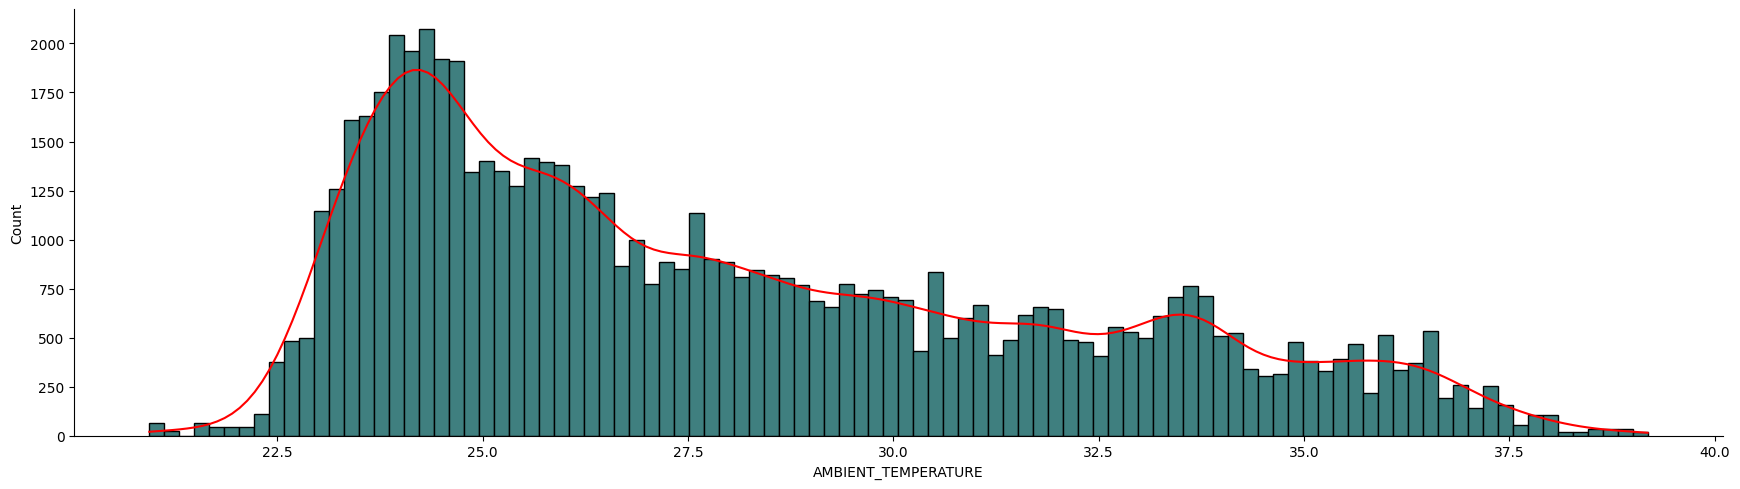

In [ ]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

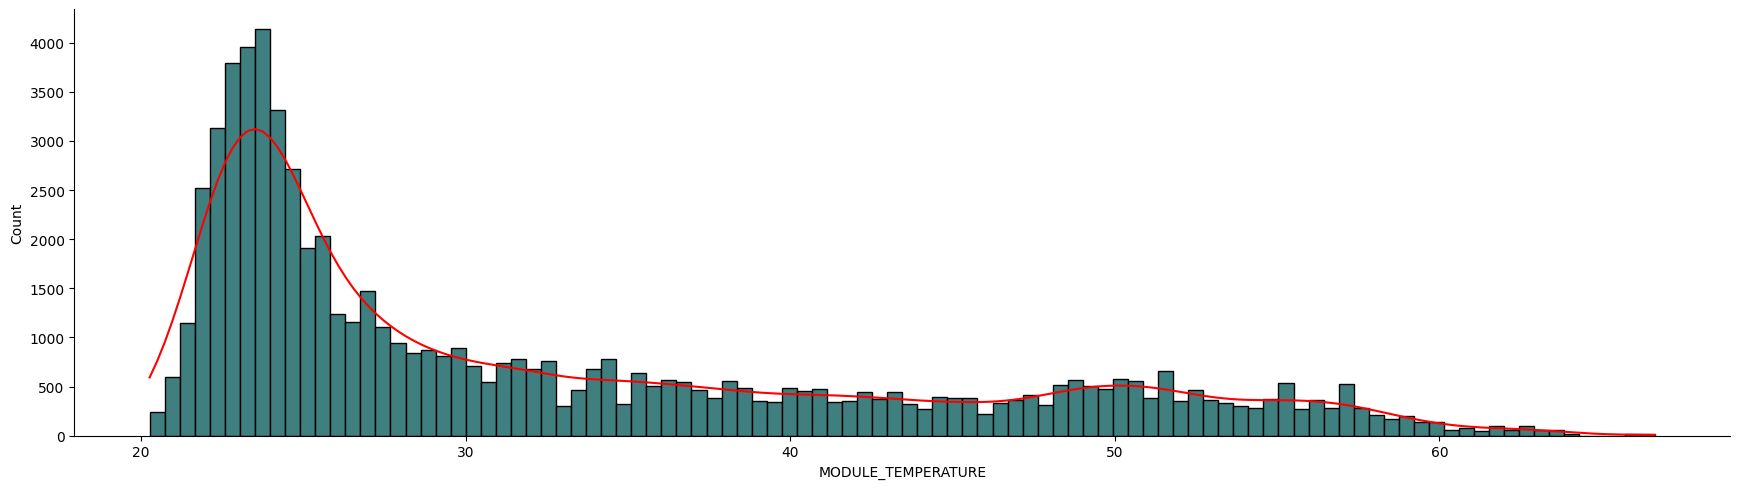

In [ ]:
sns.displot(data=df_solar, x="MODULE_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [ ]:
#distplot helps to know whether we have to apply normal distr or standard distri

In [ ]:
'''string_value = "abc"
try:
    integer_value = int(string_value)
    print(integer_value)
except ValueError:
    print("Cannot convert the string to an integer")
USING TYPECASTING'''

'string_value = "abc"\ntry:\n    integer_value = int(string_value)\n    print(integer_value)\nexcept ValueError:\n    print("Cannot convert the string to an integer")\nUSING TYPECASTING'

In [ ]:
'''ctrl+f9 to run all'''

'ctrl+f9 to run all'

In [ ]:
df=df_solar.copy()
x=df.drop('AC_POWER',axis=1) #independent
y=df['AC_POWER'] #dependent

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  int64         
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 4.6 MB


In [ ]:
#heatmap is used to check which column is more correlated to our result
#if multicorrelinearity then vif

In [ ]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  int64         
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 4.6 MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   SOURCE_KEY           3259 non-null   object        
 3   AMBIENT_TEMPERATURE  3259 non-null   float64       
 4   MODULE_TEMPERATURE   3259 non-null   float64       
 5   IRRADIATION          3259 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 152.9+ KB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  int64         
 2   SOURCE_KEY   67698 non-null  object        
 3   DC_POWER     67698 non-null  float64       
 4   AC_POWER     67698 non-null  float64       
 5   DAILY_YIELD  67698 non-null  float64       
 6   TOTAL_YIELD  67698 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.6+ MB


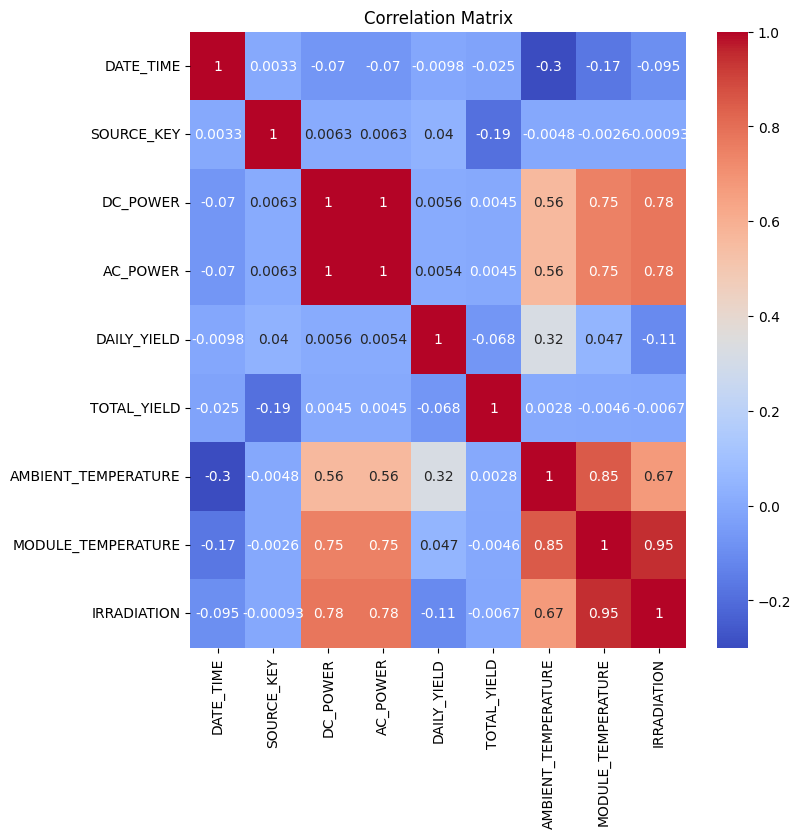

In [ ]:
# Plotting the correlation matrix "Heatmap"

# Setting the figure size for the plot
plt.figure(figsize=(8,8))

# Creating a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# df.corr() calculates the correlation coefficients between numerical features
# annot=True adds the correlation values on the heatmap
# cmap='coolwarm' sets the color palette for the heatmap

# Adding a title to the heatmap
plt.title('Correlation Matrix')
# Displaying the heatmap
plt.show()

In [ ]:
#after heatmap we have to create pairplot for preprocessing

In [ ]:
sns.pairplot(df)
#This will create scatterplots for each pair of features along with  histrograms for individual features

#display the pairplot

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#initialize VIF dataframe
vif_data = pd.DataFrame()
# Selecting only numerical features for VIF calculation
numerical_features = x.select_dtypes(include=np.number).columns
vif_data["feature"] = numerical_features

#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x[numerical_features].values, i)
                          for i in range(len(numerical_features))]

print(vif_data)

               feature         VIF
0           SOURCE_KEY    3.698580
1             DC_POWER    3.789678
2          DAILY_YIELD    2.765940
3          TOTAL_YIELD    1.885175
4  AMBIENT_TEMPERATURE  276.336636
5   MODULE_TEMPERATURE  435.604911
6          IRRADIATION   42.128265


In [ ]:
x=df.drop(['AC_POWER','MODULE_TEMPERATURE'],axis=1)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#initialize VIF dataframe
vif_data = pd.DataFrame()
# Selecting only numerical features for VIF calculation
numerical_features = x.select_dtypes(include=np.number).columns
vif_data["feature"] = numerical_features

#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x[numerical_features].values, i)
                          for i in range(len(numerical_features))]

print(vif_data)

               feature       VIF
0           SOURCE_KEY  3.690741
1             DC_POWER  3.781541
2          DAILY_YIELD  2.752324
3          TOTAL_YIELD  1.883764
4  AMBIENT_TEMPERATURE  9.405705
5          IRRADIATION  4.579768


In [ ]:
x=df.drop(['DATE_TIME','DC_POWER','AC_POWER','MODULE_TEMPERATURE','SOURCE_KEY'],axis=1)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#initialize VIF dataframe
vif_data = pd.DataFrame()
# Selecting only numerical features for VIF calculation
numerical_features = x.select_dtypes(include=np.number).columns
vif_data["feature"] = numerical_features

#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x[numerical_features].values, i)
                          for i in range(len(numerical_features))]

print(vif_data)


               feature       VIF
0          DAILY_YIELD  2.691688
1          TOTAL_YIELD  1.826100
2  AMBIENT_TEMPERATURE  5.381151
3          IRRADIATION  1.957759


In [ ]:
x.head()

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,IRRADIATION
0,9425.000000,2.429011e+06,27.004764,0.0
1,0.000000,1.215279e+09,27.004764,0.0
2,3075.333333,2.247720e+09,27.004764,0.0
3,269.933333,1.704250e+06,27.004764,0.0
4,3177.000000,1.994153e+07,27.004764,0.0


In [ ]:
#Splitting the dataset into training and testing sets(80% train,20% test)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
score_lr = 100*lr_clf.score(x_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

LR Model score = 62.0529%
R2 Score :  38.65 %


In [ ]:
# prompt: DEcision tree Regressor model score

from sklearn.tree import DecisionTreeRegressor

dt_clf = DecisionTreeRegressor()
dt_clf.fit(x_train, y_train)
score_dt = 100 * dt_clf.score(x_test, y_test)
print(f'Decision Tree Regressor Model score = {score_dt:4.4f}%')

y_pred_dt = dt_clf.predict(x_test)
R2_Score_dt = round(r2_score(y_pred_dt, y_test) * 100, 2)
print("Decision Tree Regressor R2 Score : ", R2_Score_dt, "%")

Decision Tree Regressor Model score = 88.3053%
Decision Tree Regressor R2 Score :  88.4 %


In [ ]:
#for pred only x_test
#for test both x_test,y_test

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred_dtr = dtr.predict(x_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  88.82 %


In [ ]:
# prompt: randomforest model score mean cross validation not the r2 score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

rf_clf = RandomForestRegressor()
rf_clf.fit(x_train, y_train)
score_rf = 100 * rf_clf.score(x_test, y_test)
print(f'Random Forest Regressor Model score = {score_rf:4.4f}%')
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rfr = rfr.predict(x_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

Random Forest Regressor Model score = 93.7724%
R2 Score :  93.3 %


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from numpy import mean

gbr = GradientBoostingRegressor(random_state=1)
gbr.fit(x_train, y_train)

# Cross-validation score as percentage
cv = cross_val_score(gbr, x_train, y_train, cv=5)
mean_cv_score = mean(cv) * 100
print(f"Mean Cross-Validation Score: {mean_cv_score:.2f}%")

# R2 score as percentage
y_pred_gbr = gbr.predict(x_test)
R2_Score_gbr = round(r2_score(y_pred_gbr, y_test) * 100, 2)
print(f"R2 Score: {R2_Score_gbr}%")

Mean Cross-Validation Score: 85.56%
R2 Score: 83.49%
